# Create Basic Training and Testing Data Sets

In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('GP Prescribing - July 2017 (csv).csv', encoding = "ISO-8859-1")

In [4]:
test = pd.read_csv('GP Prescribing - August 2017 (csv).csv', encoding = "ISO-8859-1")

In [5]:
train.shape

(474539, 19)

In [6]:
test.shape

(474571, 19)

In [7]:
train.columns

Index(['PRACTICE', 'Year', 'Month', 'VTM_NM', 'VMP_NM', 'AMP_NM',
       'Presentation', 'Strength', 'Total Items', 'Total Quantity',
       'Gross Cost (£)', 'Actual Cost (£)', 'BNF Code', 'BNF Chapter',
       'BNF Section', 'BNF Paragraph', 'BNF Sub-Paragraph', 'Unnamed: 17',
       'Unnamed: 18'],
      dtype='object')

In [8]:
# Check that there are not columns missing between the two. 
[i for i in train.columns if i not in test.columns]

[]

In [9]:
train = train.drop(['Gross Cost (£)', 'Unnamed: 17','Unnamed: 18'], 1)

In [10]:
test = test.drop(['Actual Cost (£)', 'Gross Cost (£)', 'Unnamed: 17','Unnamed: 18'], 1)

In [11]:
train.shape

(474539, 16)

In [12]:
test.shape

(474571, 15)

In [13]:
train = train.dropna(axis=0)

In [14]:
test = test.dropna(axis=0)

In [15]:
#I changed the name to loss so thats it compatible with the other repo.
train['loss'] = train['Actual Cost (£)']

In [16]:
train = train.drop('Actual Cost (£)', 1)

In [17]:
train_id = list(range(len(train)))

In [18]:
train['id'] = train_id

In [19]:
test['id'] = list(range(len(test)))

In [20]:
train.to_csv('/home/mark/Documents/Kaggle_Projects/Allstate-Data-Hack-2017/input/train.csv', index=False)

In [21]:
test.to_csv('/home/mark/Documents/Kaggle_Projects/Allstate-Data-Hack-2017/input/test.csv', index=False)

In [22]:
num_columns = train.describe().columns

In [23]:
num_columns

Index(['PRACTICE', 'Year', 'Month', 'Total Items', 'Total Quantity',
       'BNF Chapter', 'BNF Section', 'BNF Paragraph', 'BNF Sub-Paragraph',
       'loss', 'id'],
      dtype='object')

In [24]:
cat_columns = [col for col in test.columns if col not in num_columns]

In [25]:
cat_columns

['VTM_NM', 'VMP_NM', 'AMP_NM', 'Presentation', 'Strength', 'BNF Code']

# Basic EDA

In [77]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from collections import Counter
import scipy
import seaborn as sns
import math
color = sns.color_palette()

In [28]:
#Basic correlation with actual cost variable
train.corr()['loss']

PRACTICE            -0.002150
Year                      NaN
Month                     NaN
Total Items          0.254202
Total Quantity       0.197554
BNF Chapter         -0.062665
BNF Section          0.015666
BNF Paragraph       -0.015755
BNF Sub-Paragraph    0.009107
loss                 1.000000
id                  -0.002784
Name: loss, dtype: float64

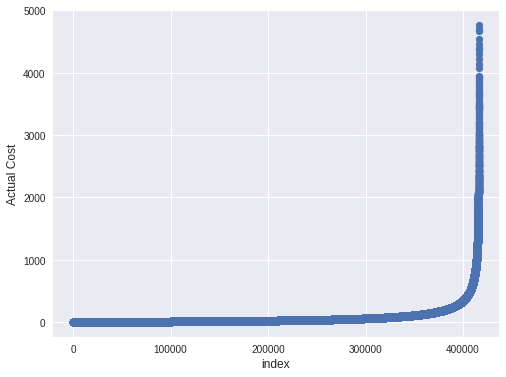

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train.loss.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Actual Cost', fontsize=12)
plt.show()

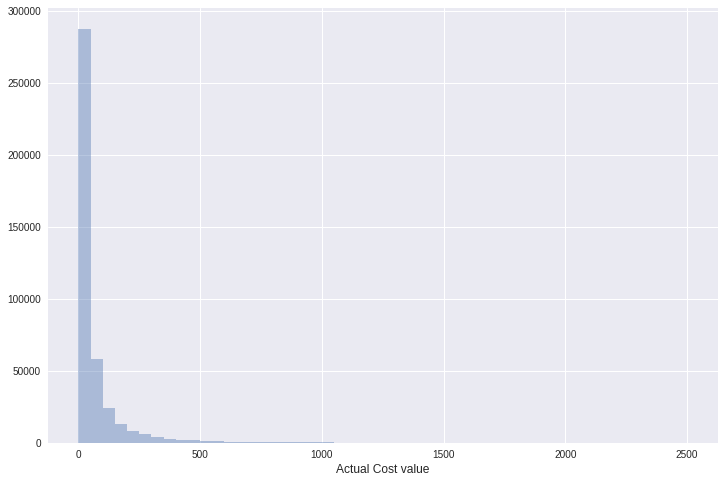

In [35]:
# ulimit = 2500
# train['loss'].ix[train['loss']>ulimit] = ulimit

plt.figure(figsize=(12,8))
sns.distplot(train.loss.values, bins=50, kde=False)
plt.xlabel('Actual Cost value', fontsize=12)
plt.show()

In [ ]:
# Clearly Not Normal. 

In [44]:
train_log_cost = [math.log(i) for i in train.loss.values]

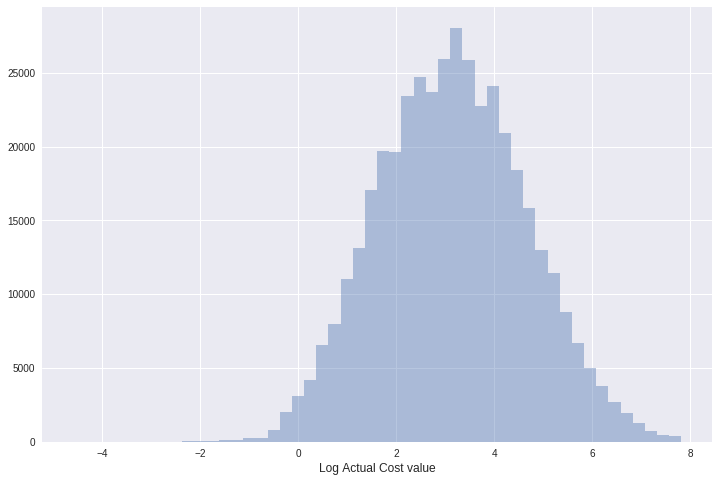

In [45]:
plt.figure(figsize=(12,8))
sns.distplot(train_log_cost, bins=50, kde=False)
plt.xlabel('Log Actual Cost value', fontsize=12)
plt.show()

In [ ]:
#Alot better! Means a log transoformation is required beforehand. 

In [46]:
train['Log Actual Cost'] = train_log_cost

In [47]:
train.corr()['Log Actual Cost']

PRACTICE            -0.002232
Year                      NaN
Month                     NaN
Total Items          0.298181
Total Quantity       0.239208
BNF Chapter         -0.064081
BNF Section          0.063928
BNF Paragraph       -0.015745
BNF Sub-Paragraph   -0.007942
loss                 0.641859
id                  -0.003814
Log Actual Cost      1.000000
Name: Log Actual Cost, dtype: float64

In [61]:
train_log_cost_norm = normalize(np.array(train_log_cost).reshape(1, -1))

In [66]:
train['Log Actual Cost Norm'] = np.array(train_log_cost).reshape(-1, 1)

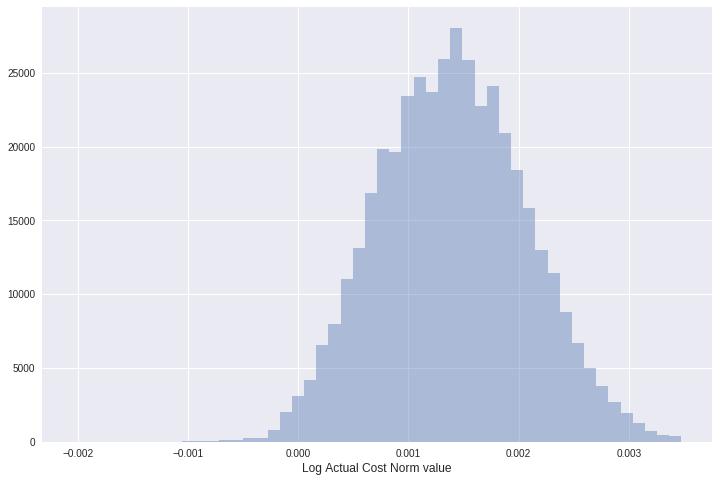

In [67]:
plt.figure(figsize=(12,8))
sns.distplot(train_log_cost_norm, bins=50, kde=False)
plt.xlabel('Log Actual Cost Norm value', fontsize=12)
plt.show()

In [72]:
train.corr()['Log Actual Cost Norm']

PRACTICE               -0.002232
Year                         NaN
Month                        NaN
Total Items             0.298181
Total Quantity          0.239208
BNF Chapter            -0.064081
BNF Section             0.063928
BNF Paragraph          -0.015745
BNF Sub-Paragraph      -0.007942
loss                    0.641859
id                     -0.003814
Log Actual Cost         1.000000
Log Actual Cost Norm    1.000000
VTM_NM Length          -0.009843
VMP_NM Length           0.132677
AMP_NM Length           0.127865
Presentation Length     0.171144
Strength Length         0.158266
BNF Code Length        -0.012733
Name: Log Actual Cost Norm, dtype: float64

In [70]:
for col in cat_columns:
    train[col + ' Length'] = [len(i) for i in train[col]]

In [74]:
train.corr()['Log Actual Cost']

PRACTICE               -0.002232
Year                         NaN
Month                        NaN
Total Items             0.298181
Total Quantity          0.239208
BNF Chapter            -0.064081
BNF Section             0.063928
BNF Paragraph          -0.015745
BNF Sub-Paragraph      -0.007942
loss                    0.641859
id                     -0.003814
Log Actual Cost         1.000000
Log Actual Cost Norm    1.000000
VTM_NM Length          -0.009843
VMP_NM Length           0.132677
AMP_NM Length           0.127865
Presentation Length     0.171144
Strength Length         0.158266
BNF Code Length        -0.012733
Name: Log Actual Cost, dtype: float64

In [76]:
train.head()

,PRACTICE,Year,Month,VTM_NM,VMP_NM,AMP_NM,Presentation,Strength,Total Items,Total Quantity,...,loss,id,Log Actual Cost,Log Actual Cost Norm,VTM_NM Length,VMP_NM Length,AMP_NM Length,Presentation Length,Strength Length,BNF Code Length
1,1.0,2017.0,7.0,-,-,-,SUSPENSION,500MG/5ML,1.0,100.0,...,24.59,0,3.202340,3.202340,1,1,1,10,9,1
8,1.0,2017.0,7.0,-,Colostomy bags,Pelican Select convex colostomy bag with filte...,Colostomy bags,"103412,Cut to fit 12mm-40mm,Clear,standard",1.0,80.0,...,238.32,1,5.473614,5.473614,1,14,57,15,42,1
9,1.0,2017.0,7.0,-,Colostomy bags,SenSura Mio Original colostomy bag midi,Colostomy bags,"10621,Starter hole 15mm-45mm,Beige,midi",2.0,180.0,...,529.08,2,6.271140,6.271140,1,14,39,15,39,1
11,1.0,2017.0,7.0,-,Dexamethasone 3.3mg/1ml solution for injection...,-,Solution for injection,3.3mg/1ml,1.0,15.0,...,16.04,3,2.775086,2.775086,1,55,1,22,9,15
12,1.0,2017.0,7.0,-,Disposal unit for hypodermic equipment,Sharpsafe disposal unit,Frontier Medical,"1LITRE, YELLOW",3.0,4.0,...,3.05,4,1.115142,1.115142,1,38,23,16,14,1


In [78]:
Counter(train['VTM_NM']).most_common()

[('-', 42137),
 ('Colecalciferol + Calcium carbonate', 3510),
 ('Pregabalin', 3474),
 ('Salbutamol', 3225),
 ('Oxycodone', 3219),
 ('Co-codamol', 3198),
 ('Quetiapine', 3052),
 ('Fluticasone + Salmeterol', 2986),
 ('Buprenorphine', 2976),
 ('Isosorbide mononitrate', 2965),
 ('Tramadol', 2932),
 ('Estradiol', 2658),
 ('Beclometasone', 2601),
 ('Sodium valproate', 2568),
 ('Lamotrigine', 2560),
 ('Mesalazine', 2517),
 ('Venlafaxine', 2454),
 ('Ibuprofen', 2440),
 ('Morphine', 2315),
 ('Metformin', 2249),
 ('Omeprazole', 2244),
 ('Paracetamol', 2237),
 ('Carbamazepine', 2200),
 ('Prednisolone', 2167),
 ('Bisoprolol', 2166),
 ('Diltiazem', 2155),
 ('Nifedipine', 2130),
 ('Betamethasone', 2098),
 ('Ramipril', 2081),
 ('Sodium chloride', 2039),
 ('Colecalciferol', 1987),
 ('Fluticasone', 1985),
 ('Olanzapine', 1879),
 ('Risperidone', 1867),
 ('Nicotine', 1820),
 ('Levetiracetam', 1817),
 ('Methylphenidate', 1811),
 ('Fentanyl', 1792),
 ('Atorvastatin', 1728),
 ('Budesonide + Formoterol', 170

In [79]:
sorted(train['VTM_NM'], key=len)[-1]

'Diphtheria + Tetanus + Pertussis + Poliomyelitis + Haemophilus influenzae type B vaccine'

In [80]:
VTM_NM_expanded = [i.split('+') for i in train['VTM_NM'].values]

In [81]:
VTM_NM_expanded = [i for sublist in VTM_NM_expanded for i in sublist]

In [82]:
VTM_NM_expanded = [i.replace(' ', '') if i[0] is ' ' else i for i in VTM_NM_expanded]

In [83]:
VTM_NM_expanded = [i.replace(' ', '') if i[-1] is ' ' else i for i in VTM_NM_expanded]

In [84]:
VTM_NM_unique = list(set(VTM_NM_expanded))

In [85]:
len(VTM_NM_unique)

956

In [86]:
VTM_NM_unique

['Perindoprilerbumine',
 'Methylcellulose',
 'Dexamethasone',
 'Prilocaine',
 'Chloral hydrate',
 'Chloramphenicol',
 'Finasteride',
 'Eplerenone',
 'Urea [13-C]',
 'Acamprosate',
 'Glycopyrronium',
 'Safinamide',
 'Trandolapril',
 'Sodium clodronate',
 'Isometheptene',
 'Triamcinolone acetonide',
 'Terazosin',
 'Industrialmethylatedspirit',
 'Baclofen',
 'Chlorpromazine',
 'Lanthanum carbonate',
 'Zafirlukast',
 'Mycophenolate mofetil',
 'Chlorhexidine',
 'Hypromellose',
 'Triptorelin',
 'Procyclidine',
 'Pioglitazone',
 'Rosuvastatin',
 'Amiloride',
 'Mesterolone',
 'Trimethoprim',
 'Fluocinonide',
 'Ibuprofen',
 'Zincundecenoate',
 'Isotretinoin',
 'Oxerutins',
 'Verapamil',
 'Lofepramine',
 'Captopril',
 'Clioquinol',
 'Darbepoetin alfa',
 'Alfentanil',
 'Lodoxamide',
 'Glutaraldehyde',
 'Ursodeoxycholic acid',
 'Terbutaline',
 'Ulipristal',
 'Co-triamterzide',
 'Dextran70',
 'Aluminium oxide',
 'Nomegestrol',
 'Magnesiumcarbonate',
 'Brinzolamide',
 'Clindamycin',
 'Co-fluampicil'

In [88]:
Counter(train['VMP_NM']).most_common()

[('Ostomy skin protectives', 1387),
 ('Isopropyl myristate 15% / Liquid paraffin 15% gel', 1176),
 ('Colecalciferol 400unit / Calcium carbonate 1.5g chewable tablets', 1163),
 ('Ostomy adhesive removers', 1159),
 ('Disposal unit for hypodermic equipment', 997),
 ('Ispaghula husk 3.5g effervescent granules sachets gluten free sugar free',
  963),
 ('Hypodermic insulin needles for pre-filled / reusable pen injectors screw on 4mm/32gauge',
  941),
 ("Carbomer '980' 0.2% eye drops", 923),
 ('Ileostomy bags', 919),
 ('Salbutamol 100micrograms/dose inhaler CFC free', 918),
 ('Sterile leg bags', 891),
 ('Two piece ostomy systems', 889),
 ('Colostomy bags', 849),
 ('Desogestrel 75microgram tablets', 823),
 ('Liquid paraffin light 63.4% bath additive', 792),
 ('Salbutamol 100micrograms/dose breath actuated inhaler CFC free', 738),
 ('Colecalciferol 400unit / Calcium carbonate 1.25g chewable tablets', 734),
 ('Metformin 500mg modified-release tablets', 726),
 ('Fluticasone 250micrograms/dose / S

In [89]:
len(Counter(train['VMP_NM']))

4009